In [132]:
from tensorflow import keras
import pandas as pd 
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [113]:
data = datasets.load_iris('data')

TypeError: load_iris() takes 0 positional arguments but 1 was given

In [172]:
iris_df = sns.load_dataset("iris")

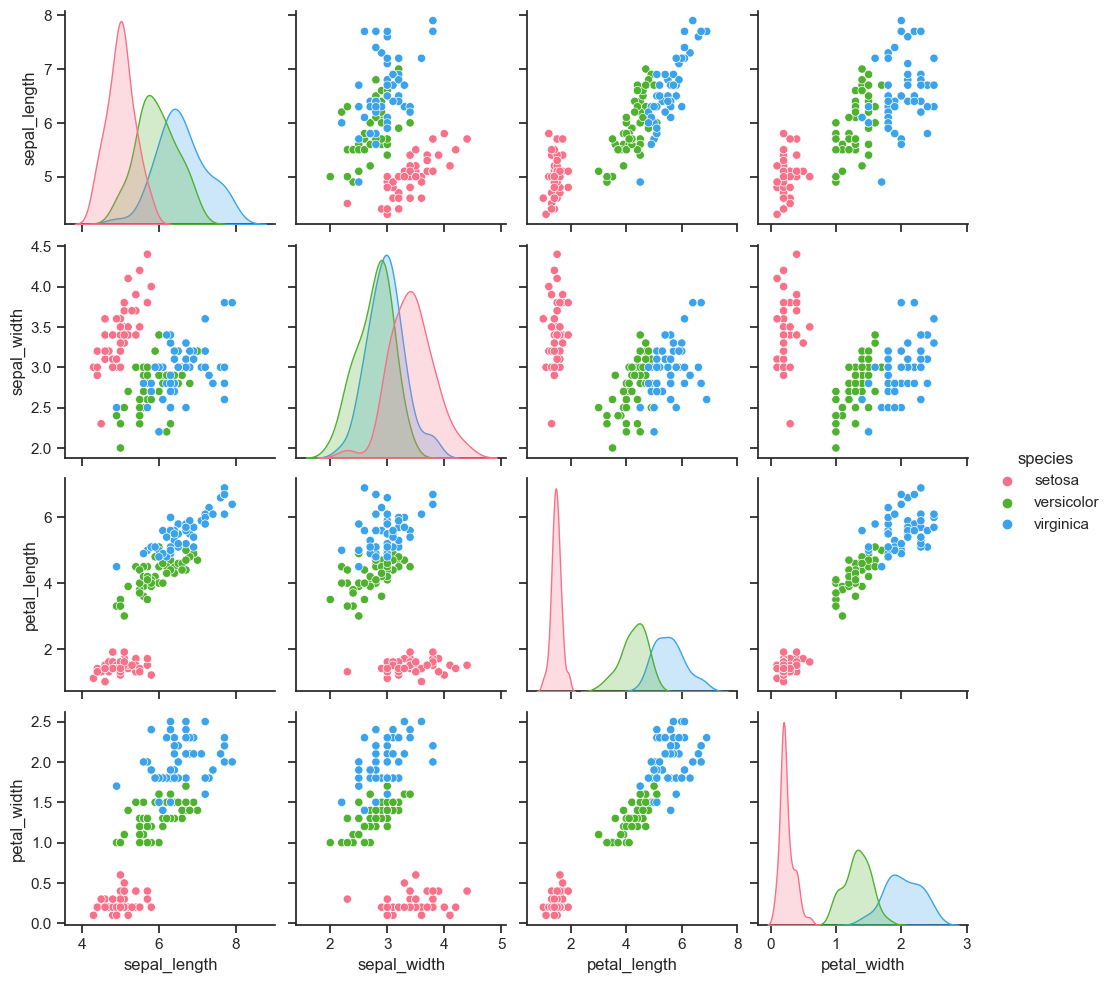

In [173]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(iris_df, hue="species", palette="husl")

In [153]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [154]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [155]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [156]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [157]:
# 컬럼 : 꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비 
iris_df.iloc[:, 0:4]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
iris_df.iloc[:,4].values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [174]:
x = iris_df.iloc[:, 0:4].values
y = iris_df.iloc[:, 4].values

In [175]:
encoder = LabelEncoder()

In [176]:
y1 = encoder.fit_transform(y)
y = pd.get_dummies(y1).values
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [177]:
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=1) 

In [179]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [190]:
# 최댓값 구하기 
len(x_train / x_train.max())

120

In [180]:
model = keras.Sequential()

In [182]:
model.add(keras.layers.Dense(300, activation = 'relu', input_shape = (4,)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))

In [183]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])

In [184]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 300)                 │           1,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 40)                  │           4,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 3)                   │             123 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,763 (139.70 KB)

 Trainable params: 35,763 (139.70 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3208 - loss: 1.2931 - val_accuracy: 0.2000 - val_loss: 1.0154
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3092 - loss: 1.2128 - val_accuracy: 0.2000 - val_loss: 1.0361
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4521 - loss: 0.9424 - val_accuracy: 0.5000 - val_loss: 0.9209
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5104 - loss: 0.8948 - val_accuracy: 0.5667 - val_loss: 0.8011
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5996 - loss: 0.8367 - val_accuracy: 0.6000 - val_loss: 0.7130
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6583 - loss: 0.7808 - val_accuracy: 0.6333 - val_loss: 0.6389
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6725 - loss: 0.7519 - val_accuracy: 0.6333 - val_loss: 0.5767
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6954 - loss: 0.6669 - val_accuracy: 0.6000 - val_loss: 0

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9392 - loss: 0.1701 - val_accuracy: 0.9667 - val_loss: 0.0978
Epoch 53/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9229 - loss: 0.2045 - val_accuracy: 0.9333 - val_loss: 0.1429
Epoch 54/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9610 - loss: 0.0904 - val_accuracy: 0.9667 - val_loss: 0.1136
Epoch 55/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9698 - loss: 0.1059 - val_accuracy: 0.9667 - val_loss: 0.0822
Epoch 56/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9565 - loss: 0.1531 - val_accuracy: 0.9667 - val_loss: 0.0850
Epoch 57/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9488 - loss: 0.1556 - val_accuracy: 0.9667 - val_loss: 0.1051
Epoch 58/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9656 - loss: 0.1072 - val_accuracy: 0.9333 - val_loss: 0.1591
Epoch 59/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9117 - loss: 0.1697 - val_accuracy: 0.9667 - val_loss: 0.0768

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9658 - loss: 0.1006 - val_accuracy: 1.0000 - val_loss: 0.0495
Epoch 104/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9477 - loss: 0.1541 - val_accuracy: 0.9667 - val_loss: 0.0576
Epoch 105/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9700 - loss: 0.0840 - val_accuracy: 0.9667 - val_loss: 0.0772
Epoch 106/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9648 - loss: 0.0919 - val_accuracy: 1.0000 - val_loss: 0.0467
Epoch 107/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9712 - loss: 0.0935 - val_accuracy: 1.0000 - val_loss: 0.0444
Epoch 108/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9510 - loss: 0.1178 - val_accuracy: 0.9667 - val_loss: 0.0672
Epoch 109/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9752 - loss: 0.0716 - val_accuracy: 0.9333 - val_loss: 0.1142
Epoch 110/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9827 - loss: 0.0948 - val_accuracy: 0.9667 - val_loss: 0

Epoch 154/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.0875 - val_accuracy: 0.9667 - val_loss: 0.0821
Epoch 155/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9860 - loss: 0.0569 - val_accuracy: 0.9667 - val_loss: 0.0716
Epoch 156/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9646 - loss: 0.0855 - val_accuracy: 0.9667 - val_loss: 0.0460
Epoch 157/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9425 - loss: 0.1158 - val_accuracy: 0.9667 - val_loss: 0.0509
Epoch 158/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9523 - loss: 0.0895 - val_accuracy: 0.9667 - val_loss: 0.0668
Epoch 159/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9585 - loss: 0.1298 - val_accuracy: 1.0000 - val_loss: 0.0355
Epoch 160/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9638 - loss: 0.1057 - val_accuracy: 1.0000 - val_loss: 0.0345
Epoch 161/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9679 - loss: 0.0868 - val_accuracy: 0.9667

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0611 - val_accuracy: 0.9667 - val_loss: 0.0494
Epoch 205/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9404 - loss: 0.1585 - val_accuracy: 1.0000 - val_loss: 0.0290
Epoch 206/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9752 - loss: 0.0891 - val_accuracy: 1.0000 - val_loss: 0.0367
Epoch 207/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9733 - loss: 0.0795 - val_accuracy: 0.9667 - val_loss: 0.0589
Epoch 208/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9837 - loss: 0.0521 - val_accuracy: 0.9667 - val_loss: 0.0653
Epoch 209/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9773 - loss: 0.0928 - val_accuracy: 1.0000 - val_loss: 0.0384
Epoch 210/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9617 - loss: 0.0855 - val_accuracy: 1.0000 - val_loss: 0.0439
Epoch 211/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9731 - loss: 0.0721 - val_accuracy: 0.9667 - val_loss:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9531 - loss: 0.1165 - val_accuracy: 1.0000 - val_loss: 0.0270
Epoch 255/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9858 - loss: 0.0542 - val_accuracy: 0.9667 - val_loss: 0.0622
Epoch 256/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9700 - loss: 0.1107 - val_accuracy: 0.9667 - val_loss: 0.0627
Epoch 257/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9785 - loss: 0.0719 - val_accuracy: 1.0000 - val_loss: 0.0355
Epoch 258/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9744 - loss: 0.1170 - val_accuracy: 0.9667 - val_loss: 0.0475
Epoch 259/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9563 - loss: 0.0688 - val_accuracy: 0.9667 - val_loss: 0.0502
Epoch 260/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9712 - loss: 0.0861 - val_accuracy: 0.9667 - val_loss: 0.0498
Epoch 261/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9804 - loss: 0.0487 - val_accuracy: 1.0000 - val_loss: 

Epoch 305/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9733 - loss: 0.0775 - val_accuracy: 1.0000 - val_loss: 0.0254
Epoch 306/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9912 - loss: 0.0418 - val_accuracy: 1.0000 - val_loss: 0.0219
Epoch 307/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9881 - loss: 0.0619 - val_accuracy: 0.9667 - val_loss: 0.0416
Epoch 308/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9583 - loss: 0.0851 - val_accuracy: 0.9667 - val_loss: 0.0598
Epoch 309/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9671 - loss: 0.1070 - val_accuracy: 0.9667 - val_loss: 0.0642
Epoch 310/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9700 - loss: 0.0904 - val_accuracy: 1.0000 - val_loss: 0.0416
Epoch 311/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9796 - loss: 0.0975 - val_accuracy: 1.0000 - val_loss: 0.0322
Epoch 312/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9648 - loss: 0.0730 - val_accuracy: 0.9667

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9892 - loss: 0.0442 - val_accuracy: 1.0000 - val_loss: 0.0191
Epoch 356/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9742 - loss: 0.0723 - val_accuracy: 1.0000 - val_loss: 0.0372
Epoch 357/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9712 - loss: 0.0838 - val_accuracy: 1.0000 - val_loss: 0.0231
Epoch 358/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9671 - loss: 0.0857 - val_accuracy: 1.0000 - val_loss: 0.0255
Epoch 359/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9542 - loss: 0.1043 - val_accuracy: 1.0000 - val_loss: 0.0287
Epoch 360/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9656 - loss: 0.0603 - val_accuracy: 1.0000 - val_loss: 0.0333
Epoch 361/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9596 - loss: 0.0694 - val_accuracy: 0.9333 - val_loss: 0.0968
Epoch 362/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9627 - loss: 0.0923 - val_accuracy: 0.9667 - val_loss:

Epoch 406/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9827 - loss: 0.0662 - val_accuracy: 0.9333 - val_loss: 0.0890
Epoch 407/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9681 - loss: 0.0885 - val_accuracy: 1.0000 - val_loss: 0.0351
Epoch 408/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9681 - loss: 0.0771 - val_accuracy: 1.0000 - val_loss: 0.0252
Epoch 409/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9825 - loss: 0.0472 - val_accuracy: 1.0000 - val_loss: 0.0279
Epoch 410/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9798 - loss: 0.0598 - val_accuracy: 1.0000 - val_loss: 0.0225
Epoch 411/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9681 - loss: 0.0869 - val_accuracy: 1.0000 - val_loss: 0.0276
Epoch 412/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9881 - loss: 0.0532 - val_accuracy: 1.0000 - val_loss: 0.0392
Epoch 413/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9806 - loss: 0.0661 - val_accuracy: 1.00

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9690 - loss: 0.0918 - val_accuracy: 0.9667 - val_loss: 0.0635
Epoch 457/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9733 - loss: 0.0726 - val_accuracy: 1.0000 - val_loss: 0.0346
Epoch 458/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9627 - loss: 0.0813 - val_accuracy: 1.0000 - val_loss: 0.0324
Epoch 459/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9767 - loss: 0.0765 - val_accuracy: 1.0000 - val_loss: 0.0413
Epoch 460/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9765 - loss: 0.1063 - val_accuracy: 0.9667 - val_loss: 0.0551
Epoch 461/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9471 - loss: 0.0951 - val_accuracy: 1.0000 - val_loss: 0.0459
Epoch 462/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9767 - loss: 0.0859 - val_accuracy: 1.0000 - val_loss: 0.0436
Epoch 463/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9648 - loss: 0.0777 - val_accuracy: 1.0000 - val_loss:

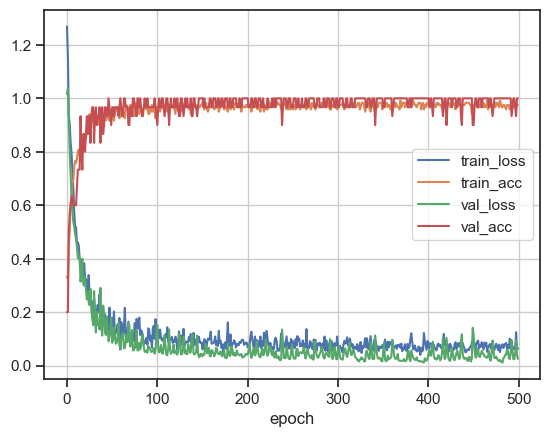

In [186]:
plt.figure()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_acc')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.show()

In [187]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy = {:.2f}'.format(accuracy))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0252
Accuracy = 1.00


In [188]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 300)                 │           1,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 40)                  │           4,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 3)                   │             123 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,291 (419.11 KB)

 Trainable params: 35,763 (139.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 71,528 (279.41 KB)